In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import statsmodels.api as sm
import pylab as py
from scipy.stats import probplot
import scipy.stats as st

warnings.filterwarnings(action='ignore')

# 1

In [2]:
df = pd.read_csv('./data_materials/table6.5_fracture.csv')
df.head()

,gender,fracture,age,blood
0,1,1,42,35
1,1,1,42,43
2,1,1,38,35
3,1,1,35,33
4,1,1,25,31


In [6]:
#a
pd.crosstab(df['gender'], df['fracture'])

fracture,1,2,3
gender,,,
1,6,4,0
2,0,7,5


In [9]:
#b
df.groupby('gender').mean()['blood']

gender
1    32.900000
2    38.833333
Name: blood, dtype: float64

In [10]:
#c
df.groupby('fracture').mean()['blood']

fracture
1    35.500000
2    32.545455
3    44.800000
Name: blood, dtype: float64

In [12]:
#d
st.pearsonr(df.age, df.blood)[0]

-0.04325692537768136

In [14]:
#e
st.spearmanr(df.age, df.blood)[0]

-0.049645392068624034

<AxesSubplot:xlabel='fracture', ylabel='blood'>

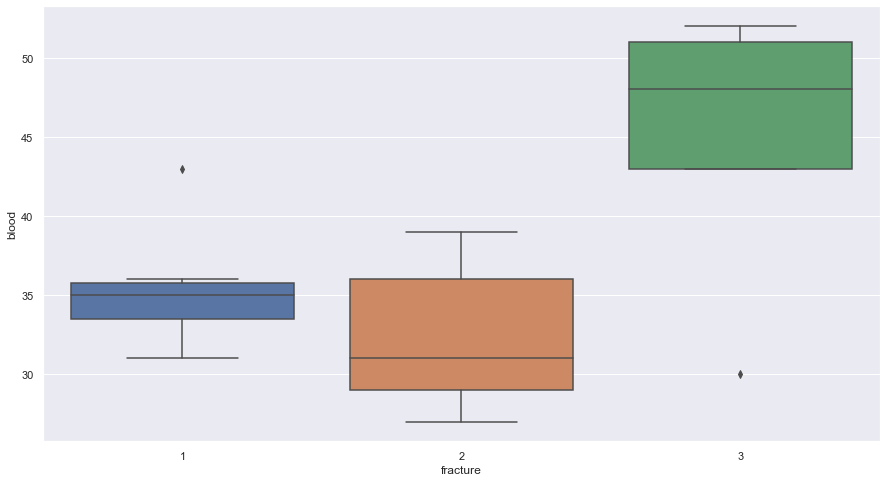

In [16]:
#f
sns.boxplot(df.fracture, df.blood)

<AxesSubplot:xlabel='gender', ylabel='blood'>

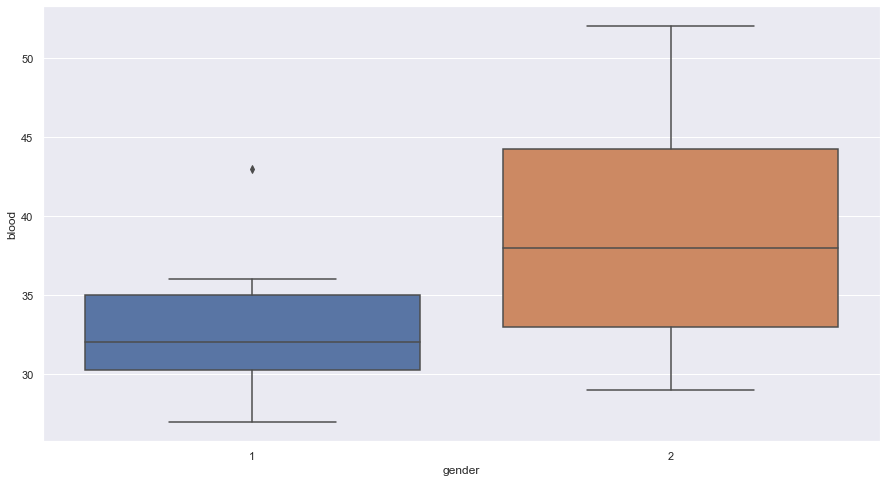

In [17]:
#g
sns.boxplot(df.gender, df.blood)

<AxesSubplot:xlabel='age', ylabel='blood'>

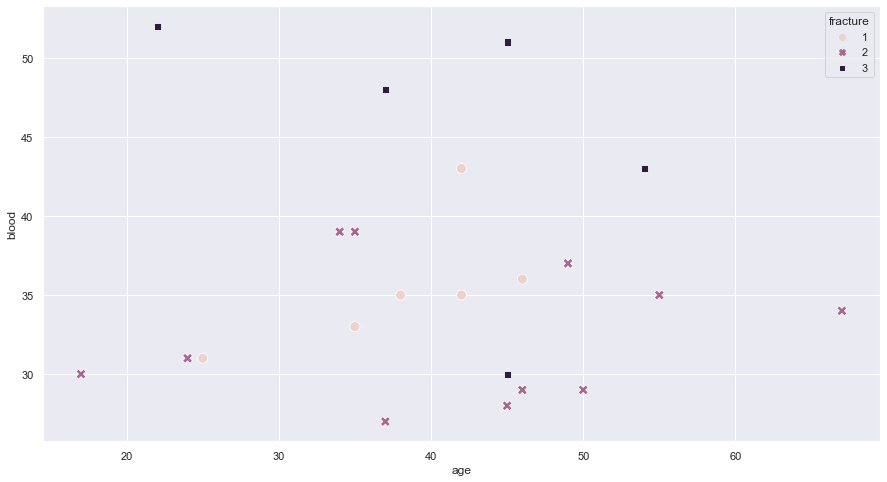

In [26]:
#h
sns.scatterplot(df.age, df.blood, hue=df.fracture, style=df.fracture, s=100)

<AxesSubplot:xlabel='age', ylabel='blood'>

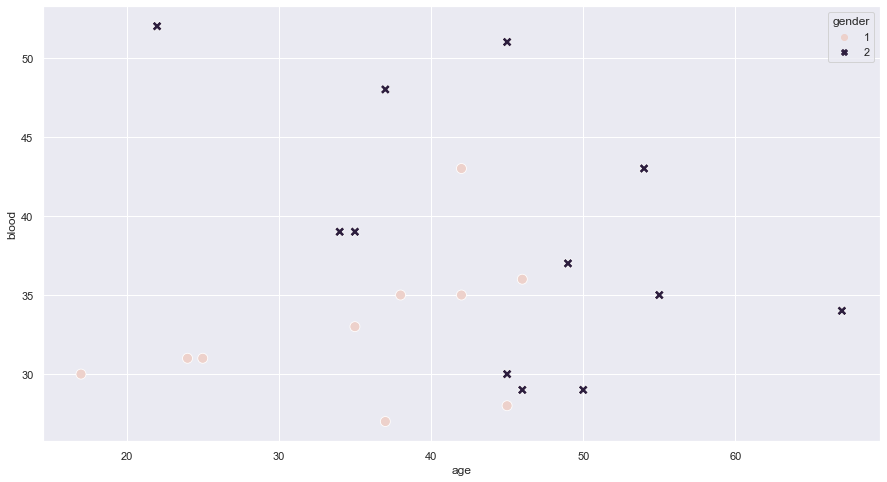

In [27]:
#i
sns.scatterplot(df.age, df.blood, hue=df.gender, style=df.gender, s=100)

# 2

In [28]:
df = pd.read_csv("./data_materials/table6.6_president_election.csv")

In [30]:
df

,ism,candidate,freq
0,progress,M,426
1,middle,M,543
2,conservative,M,130
3,progress,H,59
4,middle,H,373
5,conservative,H,625
6,progress,A,215
7,middle,A,674
8,conservative,A,245


In [42]:
#a
pd.pivot_table(data=df, aggfunc='sum', index='ism', columns='candidate')

freq          
candidate       A    H    M
ism                        
conservative  245  625  130
middle        674  373  543
progress      215   59  426

In [45]:
#b
df['rate'] = df.freq / sum(df.freq)

In [46]:
df

,ism,candidate,freq,rate
0,progress,M,426,0.129483
1,middle,M,543,0.165046
2,conservative,M,130,0.039514
3,progress,H,59,0.017933
4,middle,H,373,0.113374
5,conservative,H,625,0.189970
6,progress,A,215,0.065350
7,middle,A,674,0.204863
8,conservative,A,245,0.074468


In [50]:
pd.pivot_table(data=df, index='ism', columns='candidate', values='rate', margins=True, aggfunc='sum')

candidate,A,H,M,All
ism,,,,
conservative,0.074468,0.189970,0.039514,0.303951
middle,0.204863,0.113374,0.165046,0.483283
progress,0.065350,0.017933,0.129483,0.212766
All,0.344681,0.321277,0.334043,1.000000


In [51]:
#c
pd.pivot_table(data=df, index='ism', columns='candidate', values='freq', margins=True, aggfunc='sum')

candidate,A,H,M,All
ism,,,,
conservative,245,625,130,1000
middle,674,373,543,1590
progress,215,59,426,700
All,1134,1057,1099,3290


<AxesSubplot:xlabel='ism'>

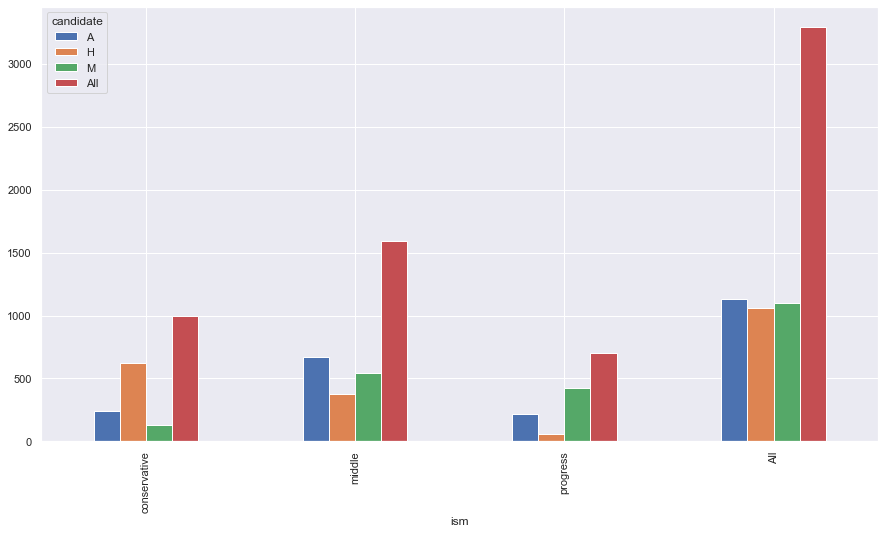

In [63]:
#d
pd.pivot_table(data=df, index='ism', columns='candidate', values='freq', margins=True, aggfunc='sum').plot(kind='bar')